In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import recall_score

## Data Prep

In [2]:
df = pd.read_csv("./data/Train 2.csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [4]:
# Assuming your DataFrame is named df
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1,4,2,177,3,44,1233,1,False,False,True,False,False,False,True,False,False
1,2,4,5,216,2,59,3088,1,False,False,False,True,False,False,True,False,True
2,3,2,2,183,4,48,3374,1,False,False,False,False,False,False,True,False,True
3,4,3,3,176,4,10,1177,1,True,False,False,False,False,False,False,True,True
4,5,2,2,184,3,46,2484,1,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,1,1538,1,False,False,False,False,False,True,False,True,False
10995,10996,4,1,232,5,6,1247,0,True,False,False,False,False,True,False,True,False
10996,10997,5,4,242,5,4,1155,0,False,True,False,False,False,True,True,False,False
10997,10998,5,2,223,6,2,1210,0,False,False,False,True,False,True,False,True,True


## Data Train

In [8]:
# Assuming 'Reached on time' is your target column
X = df_encoded.drop('Reached.on.Time_Y.N', axis=1)
y = df_encoded['Reached.on.Time_Y.N']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

## Model Performance

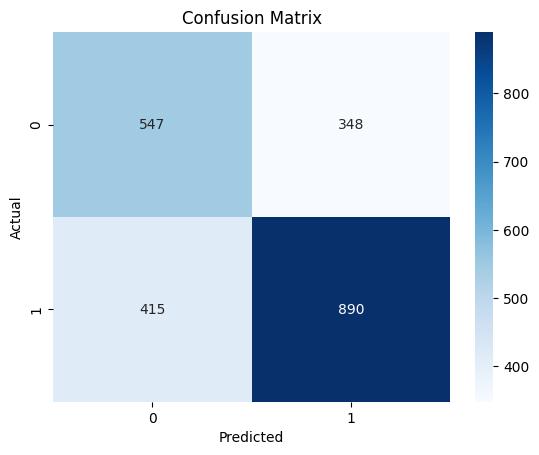

Accuracy: 0.6531818181818182


In [ ]:

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

In [14]:
sensitivity = recall_score(y_test, y_pred)
print("Sensitivity (Recall):", sensitivity)

Sensitivity (Recall): 0.6819923371647509


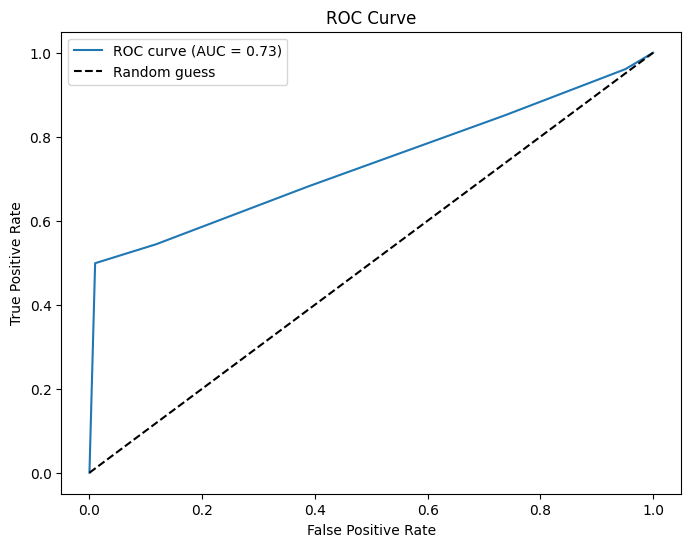

In [12]:
# Get probability estimates for the positive class
y_proba = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()